In [1]:
import pandas as pd


trade_df=pd.read_csv(r"C:\Users\ASUS\Downloads\historical_data.csv")
sentiment_df=pd.read_csv(r"C:\Users\ASUS\Downloads\fear_greed_index.csv")

In [2]:
print(trade_df.sample(5))
print(sentiment_df.sample(5))


                                           Account      Coin  Execution Price  \
202936  0x92f17e8d81a944691c10e753af1b1baae1a2cd0d  FARTCOIN          1.16330   
115013  0x8477e447846c758f5a675856001ea72298fd9cb5      SAND          0.30161   
67712   0xbaaaf6571ab7d571043ff1e313a9609a10637864      HYPE         20.11600   
74634   0xbaaaf6571ab7d571043ff1e313a9609a10637864      HYPE         13.05000   
59689   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd      HYPE         18.50200   

        Size Tokens  Size USD  Side     Timestamp IST  Start Position  \
202936     41216.40  47947.04   BUY  23-04-2025 03:30            0.00   
115013       166.00     50.07  SELL  29-04-2025 00:51         -498.00   
67712         98.76   1986.66   BUY  25-02-2025 05:23       192603.79   
74634         38.31    499.95   BUY  11-03-2025 06:17       188524.62   
59689          5.40     99.91  SELL  24-04-2025 02:35         1755.79   

         Direction  Closed PnL  \
202936   Open Long     0.00000   
115013

In [3]:
print(trade_df.dtypes)
print(sentiment_df.dtypes)

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object
timestamp          int64
value              int64
classification    object
date              object
dtype: object


In [4]:
print(trade_df.isnull().sum())
print(trade_df.isnull().sum())
trade_df = trade_df.dropna()
sentiment_df = sentiment_df.dropna()


Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [5]:
print(trade_df.describe())
print(sentiment_df.describe())


       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  1.732711e+08      -1.175712

In [6]:
print(sentiment_df.groupby('classification')['value'].describe())


sentiment_df['datetime'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')## 10 digit number in unix format.
trade_df['datetime']= pd.to_datetime(trade_df['Timestamp'], unit='ms') #13 digit number in unix format

                count       mean       std   min   25%   50%    75%   max
classification                                                           
Extreme Fear    508.0  18.273622  4.699441   5.0  14.0  20.0  22.00  24.0
Extreme Greed   326.0  82.116564  6.532657  75.0  76.0  80.0  87.75  95.0
Fear            781.0  34.184379  6.092182  25.0  28.0  34.0  40.00  44.0
Greed           633.0  65.846761  6.246282  55.0  61.0  66.0  72.00  74.0
Neutral         396.0  49.964646  2.645993  45.0  48.0  50.0  52.00  54.0


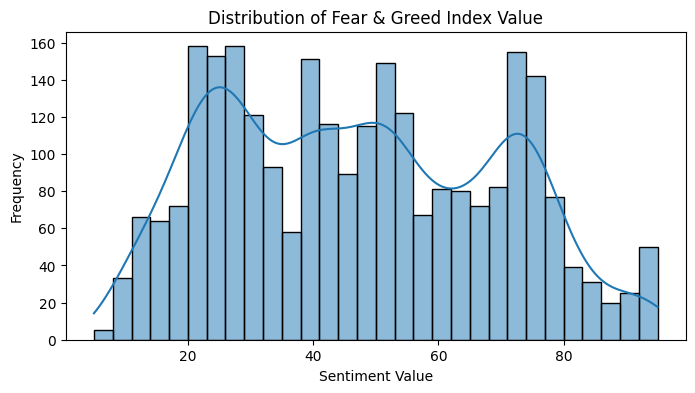

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(sentiment_df['value'], bins=30, kde=True)
plt.title("Distribution of Fear & Greed Index Value")
plt.xlabel("Sentiment Value")
plt.ylabel("Frequency")
plt.show()


<Axes: xlabel='datetime', ylabel='datetime'>

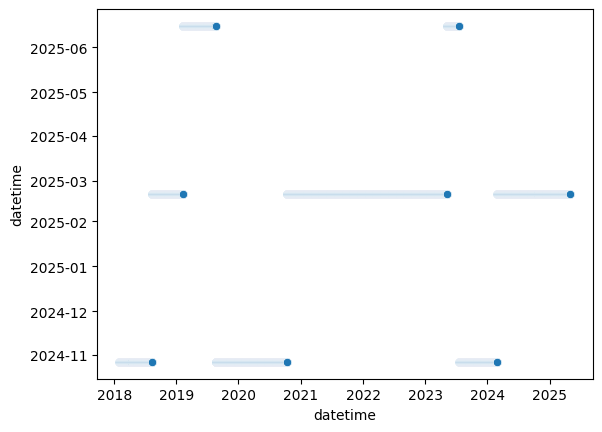

In [8]:
sns.scatterplot(x=sentiment_df['datetime'],y=trade_df["datetime"])